In [1]:
# -*- coding: utf-8 -*-
"""
Created on June 3, 2024
Last modified on June 3, 2024
@Author: Guan-Fu Liu

To check the yields files
"""
from read_results import *
import re
from matplotlib.gridspec import GridSpec
%matplotlib widget

In [2]:
file_paths = ["./outputs/LRNAs/N13-0.0-HN.h5", "./outputs/LRNAs/N13-0.5-HN.h5",
              "./outputs/LRNAs/N13-1.0-HN.h5", "./outputs/LRNAs/K10-N13.h5", "./outputs/LRNAs/MESA-only.h5"]
models = ["0% HN", "50% HN", "100% HN", "K10-N13", "MESA-only"]

dfs_all = { }
YieldsTable_all = { }
for i, file_path in enumerate(file_paths):
    yield_files, groups, ElemNotice, dfs, ElemIntersect, SNIaOn, mass_lifeAge_file, mass_lifeAge, SFH, StarInitElement,\
                StellarMass, SNccNum, SNIaNum, AGB_Num, GasElement, ZGas, EjectElement, SNccElement, SNIaElement,\
                AGB_Element, YieldsTable, IMF_type, IMF_data, creation_Age, SFE, \
                interp_kind, comments, solar_set = read_results(file_path)
    dfs_all[models[i]] = dfs
    YieldsTable_all[models[i]] = YieldsTable

The elements you notice but not available in the yield table of SNIa, Z_0_02 are
 {'H', 'He'}
The yields from SNIa are taken into consideration in the result to be analysed.
The elements you notice but not available in the yield table of SNIa, Z_0_02 are
 {'H', 'He'}
The yields from SNIa are taken into consideration in the result to be analysed.
The elements you notice but not available in the yield table of SNIa, Z_0_02 are
 {'H', 'He'}
The yields from SNIa are taken into consideration in the result to be analysed.
The elements you notice but not available in the yield table of SNIa, Z_0_02 are
 {'H', 'He'}
The yields from SNIa are taken into consideration in the result to be analysed.
The elements you notice but not available in the yield table of SNIa, Z=0.02 are
 {'H', 'He'}
The yields from SNIa are taken into consideration in the result to be analysed.


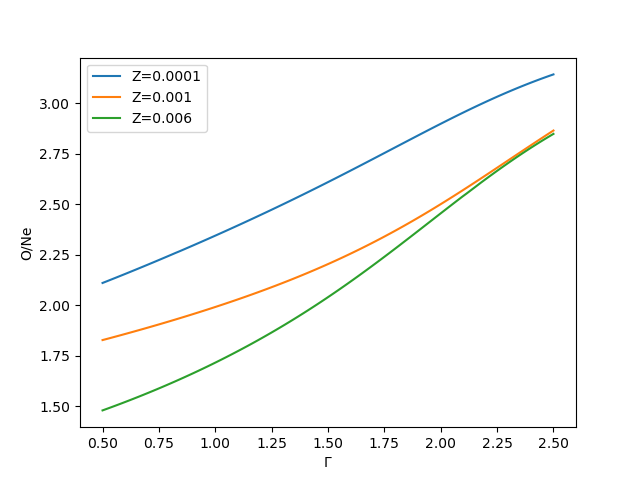

In [3]:
# dfs_all['0% HN']['AGB+SNcc']
def PowerLaw(m, Gamma, interp):
    return m**(-Gamma-1)*interp(m)

fig, ax = plt.subplots()
model = 'MESA-only'
Zmax = re.search(r'Z=(.*?),', YieldsTable_all[model][72,1].astype(str)).group(1)
Zmax = float(Zmax)
for key in dfs_all[model]['AGB+SNcc'].keys():
    Zini = key.replace("Z_","").replace("_",".")
    Zini = Zini.replace("Z=","")
    Zini = float(Zini)
    if Zini > Zmax:
        continue
    x = dfs_all[model]['AGB+SNcc'][key].columns.to_numpy().astype(float)
    y1 = dfs_all[model]['AGB+SNcc'][key].loc["O"].to_numpy().astype(float)
    y2 = dfs_all[model]['AGB+SNcc'][key].loc["Ne"].to_numpy().astype(float)
    interp1 = interpolate.interp1d(x, y1, kind='linear', fill_value='extrapolate')
    interp2 = interpolate.interp1d(x, y2, kind='linear', fill_value='extrapolate')
    mass_bound = 1
    O2Ne = { }
    O2Ne[solar_set] = constants.abund_tables[solar_set][constants.elem_names.index("O")]/\
        constants.abund_tables[solar_set][constants.elem_names.index("Ne")]
    Gammas = np.linspace(0.5, 2.5, 100)
    Oxygen = np.array([quad(PowerLaw, mass_bound, constants.Mstar_max, args=(Gamma, interp1), full_output=1)[0] \
                    for Gamma in Gammas])
    Neon = np.array([quad(PowerLaw, mass_bound, constants.Mstar_max, args=(Gamma, interp2), full_output=1)[0] \
                    for Gamma in Gammas])
    ax.plot(Gammas, Oxygen/Neon/(O2Ne[solar_set]), label=key.replace("Z_","Z=").replace("_","."))

ax.set_xlabel(r"$\Gamma$")
ax.set_ylabel("O/Ne")
ax.legend()
plt.show()

In [4]:
ElemNotice = ["H", "He", "C", "N", "O", "Ne", "Fe", "Other"]
# yield_files = { 
#     "AGB+SNcc": "./inputs/NuPyCEE/isotope_yield_table_MESA_only/yields1.h5",
#     "SNIa": "./inputs/NuPyCEE/sn1a_i99_W7/yields1.h5",
# }
yield_files = { 
    "N13": "./inputs/NuPyCEE/agb_and_massive_stars_nugrid_N13/yields1.h5",
    "MESA-only-F12-delay": "./inputs/NuPyCEE/agb_and_massive_stars_nugrid_MESAonly_fryer12delay/yields1.h5",
    "MESA-only-F12-rapid": "./inputs/NuPyCEE/agb_and_massive_stars_nugrid_MESAonly_fryer12rapid/yields1.h5",
    "MESA-only-F12-ye": "./inputs/NuPyCEE/agb_and_massive_stars_nugrid_MESAonly_ye/yields1.h5",
    "MESA-only-F12-mix": "./inputs/NuPyCEE/agb_and_massive_stars_nugrid_MESAonly_fryer12mix/yields1.h5",
    "MESA-only-F12-delay-wind": "./inputs/NuPyCEE/agb_and_massive_stars_nugrid_MESAonly_fryer12delay_wind_preexp/yields1.h5",
    "K10": "./inputs/NuPyCEE/agb_and_massive_stars_nugrid_K10/yields1.h5",
    "K06": "./inputs/NuPyCEE/agb_and_massive_stars_nugrid_K06/yields1.h5",
    "FRUITY": "./inputs/NuPyCEE/agb_and_massive_stars_nugrid_FRUITY/yields1.h5",
    "K10-LC18-Ravg": "./inputs/NuPyCEE/agb_and_massive_stars_K10_LC18_Ravg/yields1.h5",
    "K10-LC18-R300": "./inputs/NuPyCEE/agb_and_massive_stars_K10_LC18_R300/yields1.h5",
    "K10-LC18-R150": "./inputs/NuPyCEE/agb_and_massive_stars_K10_LC18_R150/yields1.h5",
    "K10-LC18-R000": "./inputs/NuPyCEE/agb_and_massive_stars_K10_LC18_R000/yields1.h5",
    "K10-K06-1.0-HN": "./inputs/NuPyCEE/agb_and_massive_stars_K10_K06_1.0HNe/yields1.h5",
    "K10-K06-0.5-HN": "./inputs/NuPyCEE/agb_and_massive_stars_K10_K06_0.5HNe/yields1.h5",
    "K10-K06-0.0-HN": "./inputs/NuPyCEE/agb_and_massive_stars_K10_K06_0.0HNe/yields1.h5",
    "C15-N13-1.0-HN": "./inputs/NuPyCEE/agb_and_massive_stars_C15_N13_1_0_HNe/yields1.h5",
    "C15-N13-0.5-HN": "./inputs/NuPyCEE/agb_and_massive_stars_C15_N13_0_5_HNe/yields1.h5",
    "C15-N13-0.0-HN": "./inputs/NuPyCEE/agb_and_massive_stars_C15_N13_0_0_HNe/yields1.h5",
    "C15-LC18-Rmix": "./inputs/NuPyCEE/agb_and_massive_stars_C15_LC18_R_mix/yields1.h5",
    "P98-M01": "./inputs/NuPyCEE/isotope_yield_table_portinari98_marigo01_gce_totalyields/yields1.h5",
    "galIMF": "./inputs/NuPyCEE/portinari98_gce_in_igimf/yields1.h5"
}


def read_yields(yield_files, ElemNotice):
    """
    To read the yield tables and check the elements in the yield tables.
    
    Parameters
    ----------
    yield_files : dict
        The dictionary of the yield files.
    ElemNotice : list
        The list of the elements you notice.
    
    Returns
    -------
    dfs : dict
        The dictionary of the yield tables.
    """

    files = {key: h5py.File(value, 'r') for key, value in yield_files.items()}
    groups = {key: list(files[key].keys()) for key in files.keys()}
    if "Z_" in groups[list(groups.keys())[0]][0] or "Z_" in groups[list(groups.keys())[0]][0]:
        # for yields2.h5, the group names cannot contain "." and "_".
        # Therefore their group names are like "Z_0_0001", "Z_0_0003", etc.
        groups_Z = {key: [group.replace("Z_","Z=").replace("_",".") for group in groups[key]] for key in groups.keys()}
    else:
        groups_Z = groups
    # groups_Z is a dictionary like:
    # {'AGB+SNcc': ['Z=0.0001', 'Z=0.0003', 'Z=0.001', 'Z=0.002',],
    #  'SNIa': ['Z=0.0002', 'Z=0.002', 'Z=0.01', 'Z=0.02']}
    Zyield = {key: np.array([float(group.split("=")[1]) for group in groups_Z[key]]) for key in groups.keys()}
    # Zyield is a dictionary like:
    # {'AGB+SNcc': array([0.0001, 0.0003, 0.001 , 0.002 ]),
    #  'SNIa': array([0.0002, 0.002 , 0.01  , 0.02  ])}
    # Sort the metallicity values in ascending order
    groups = {key: [groups[key][a] for a in Zyield[key].argsort()] for key in groups.keys()}
    groups_Z = {key: [groups_Z[key][a] for a in Zyield[key].argsort()] for key in groups_Z.keys()}
    # Check the ElemNotice
    # It should contain H, He and Other.
    # The finally selected elements are the intersection of ElemNotice and the elements avaliable in the yield table.
    # You may as well not to notice too many elements, which will speed down the calculation.
    if "H" not in ElemNotice:
        print("H should be in ElemNotice!")
        print("Add H to ElemNotice!")
        ElemNotice.append("H")
    if "He" not in ElemNotice:
        print("He should be in ElemNotice!")
        print("Add He to ElemNotice!")
        ElemNotice.append("He")
    if "Other" not in ElemNotice:
        print("Other should be in ElemNotice!")
        print("Add Other to ElemNotice!")
        ElemNotice.append("Other")
    dfs = { }
    ElemIntersect = { }
    if "Z_" not in groups[list(groups.keys())[0]][0]:
        for key in files.keys():
            dfs[key] = { }
            ElemIntersect[key] = { }
            for group in groups[key]:
                if key == "SNIa":
                    dfs[key][group] = pd.DataFrame(files[key][group]['Original'][...])
                else:
                    dfs[key][group] = pd.DataFrame(files[key][group]['Interpolated'][...])
                dfs[key][group].loc[:, 'M'] = dfs[key][group].loc[:, 'M'].astype(str)
                dfs[key][group].set_index('M', inplace=True)
                index = dfs[key][group].index
                index = [False if a in ElemNotice + ['Mrem'] else True for a in index]
                # Add the mass of the elements not in ElemNotice to the "Other" element
                if "Other" in dfs[key][group].index:
                    dfs[key][group].loc["Other"] += dfs[key][group].loc[index].sum(axis=0)
                else:
                    dfs[key][group].loc["Other"] = dfs[key][group].loc[index].sum(axis=0)
                ElemIntersect[key][group] = list(set(ElemNotice).intersection(set(dfs[key][group].index)))
    else:
        for key in files.keys():
            dfs[key] = { }
            ElemIntersect[key] = { }
            for group in groups[key]:
                if key == "SNIa":
                    dfs[key][group] = pd.read_hdf(yield_files["SNIa"], key="%s/Original"%group)
                else:
                    dfs[key][group] = pd.read_hdf(yield_files["AGB+SNcc"], key="%s/Interpolated"%group)
                index = dfs[key][group].index
                index = [False if a in ElemNotice + ['Mrem'] else True for a in index]
                # Add the mass of the elements not in ElemNotice to the "Other" element
                if "Other" in dfs[key][group].index:
                    dfs[key][group].loc["Other"] += dfs[key][group].loc[index].sum(axis=0)
                else:
                    dfs[key][group].loc["Other"] = dfs[key][group].loc[index].sum(axis=0)
                ElemIntersect[key][group] = list(set(ElemNotice).intersection(set(dfs[key][group].index)))
    for key in files.keys():
        for group in groups[key]:
            if len(set(ElemNotice)-set(ElemIntersect[key][group]))>0:
                print("The elements you notice but not available in the yield table of %s, %s are\n" %\
                    (key, group), set(ElemNotice)-set(ElemIntersect[key][group]))
    
    return dfs

In [5]:
# From observation data, multi-temperature model.
data = {}
data['O'] = 0.22
data['O_err'] = 0.035
data['Ne'] = 0.21
data['Ne_err'] = 0.055


def Get_obs_ratio(Zi, Zj, data=data):
    """
    Generate the observed Zi/Zj ratio, the error, and the 1, 2, 3 sigma range.

    Parameters
    ----------
    Zi : str
        The element name.
    Zj : str
        The element name.
    data : dict
        The dictionary of the observation data.
        It must contain 'Zi', 'Zj', 'Zi_err', 'Zj_err'.
    
    Returns
    -------
    data : dict
        The dictionary of the observation data.
        It contains 'Zi', 'Zj', 'Zi_err', 'Zj_err', 'Zi/Zj', 'Zi/Zj_err', 'Zi/Zj+1sigma', 'Zi/Zj-1sigma',
        'Zi/Zj+2sigma', 'Zi/Zj-2sigma', 'Zi/Zj+3sigma', 'Zi/Zj-3sigma'.
    """
    data['%s/%s'%(Zi,Zj)] = data[Zi]/data[Zj]
    data['%s/%s_err'%(Zi,Zj)] = np.sqrt((data['%s_err'%Zi]/data[Zj])**2+(data['%s_err'%Zj]*data[Zi]/data[Zj]**2)**2)
    data['%s/%s+1sigma'%(Zi,Zj)] = data['%s/%s'%(Zi,Zj)]+data['%s/%s_err'%(Zi,Zj)]
    data['%s/%s-1sigma'%(Zi,Zj)] = data['%s/%s'%(Zi,Zj)]-data['%s/%s_err'%(Zi,Zj)]
    data['%s/%s+2sigma'%(Zi,Zj)] = data['%s/%s'%(Zi,Zj)]+2*data['%s/%s_err'%(Zi,Zj)]
    data['%s/%s-2sigma'%(Zi,Zj)] = data['%s/%s'%(Zi,Zj)]-2*data['%s/%s_err'%(Zi,Zj)]
    data['%s/%s+3sigma'%(Zi,Zj)] = data['%s/%s'%(Zi,Zj)]+3*data['%s/%s_err'%(Zi,Zj)]
    data['%s/%s-3sigma'%(Zi,Zj)] = data['%s/%s'%(Zi,Zj)]-3*data['%s/%s_err'%(Zi,Zj)]
    return data


obs_data = Get_obs_ratio('O', 'Ne', data=data)

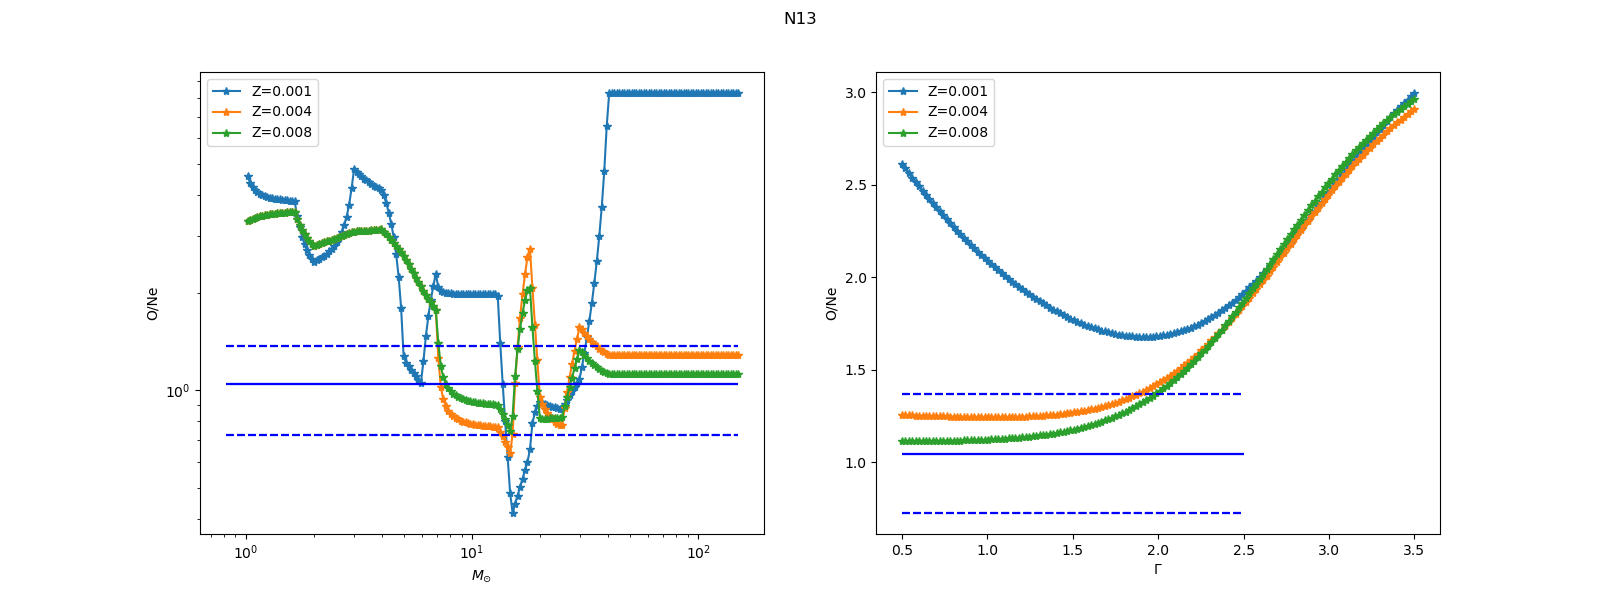

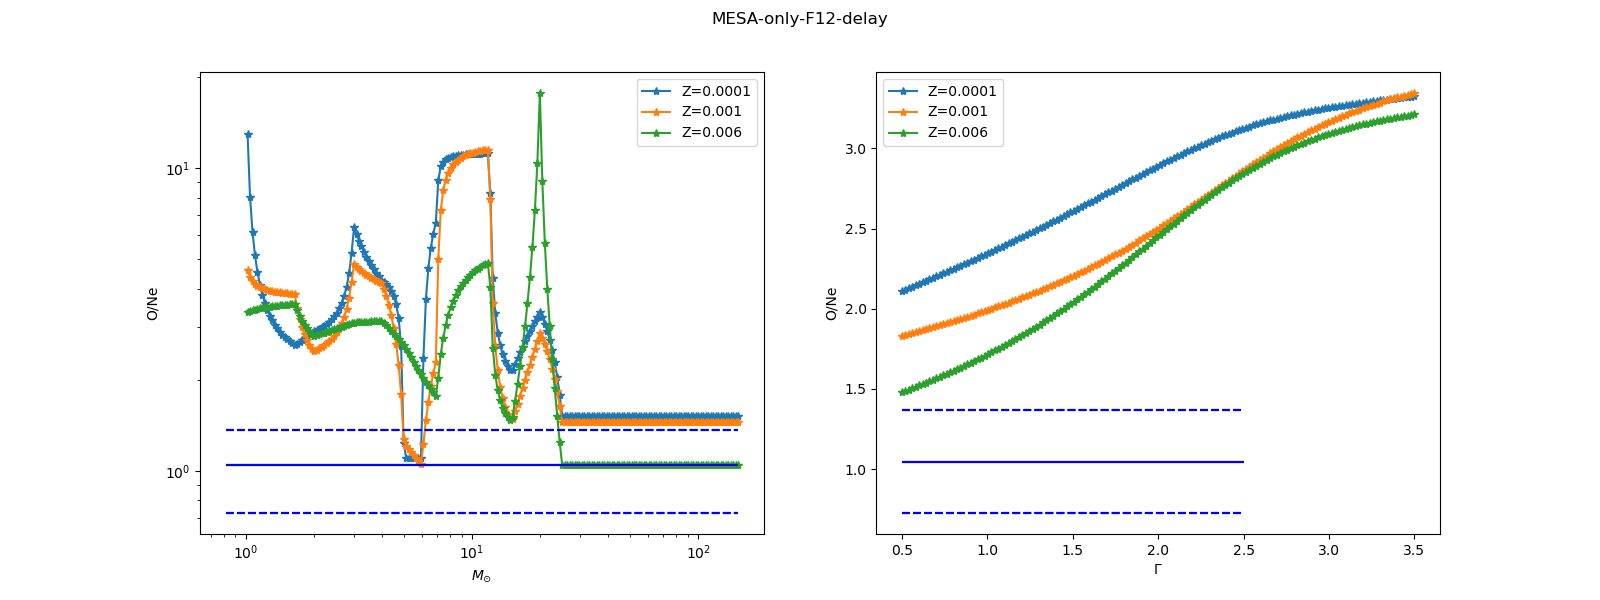

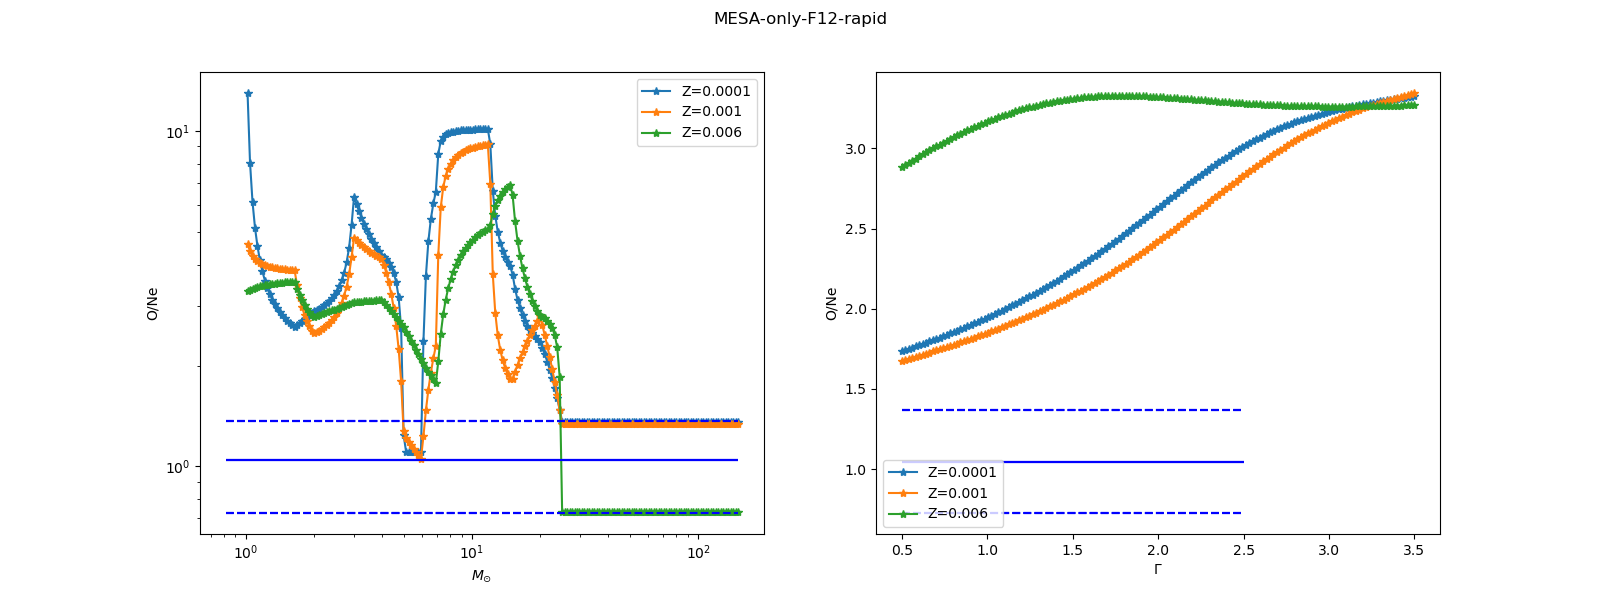

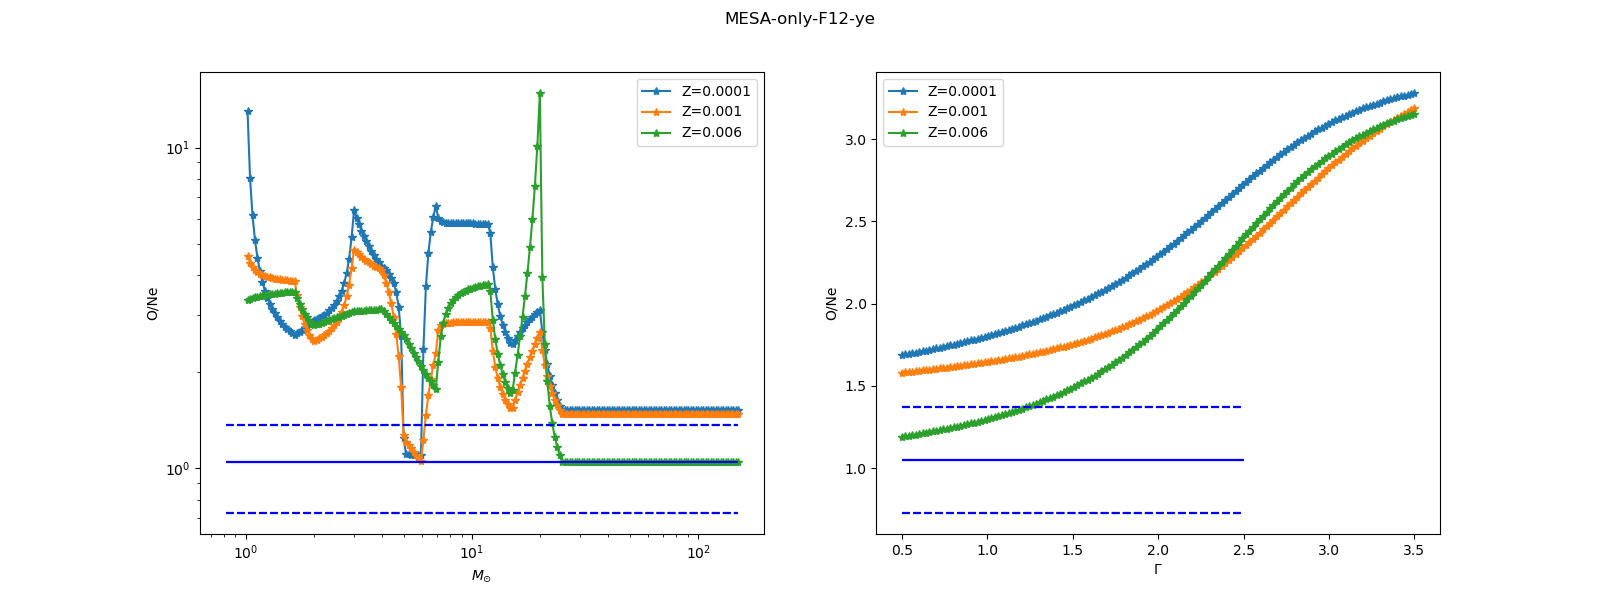

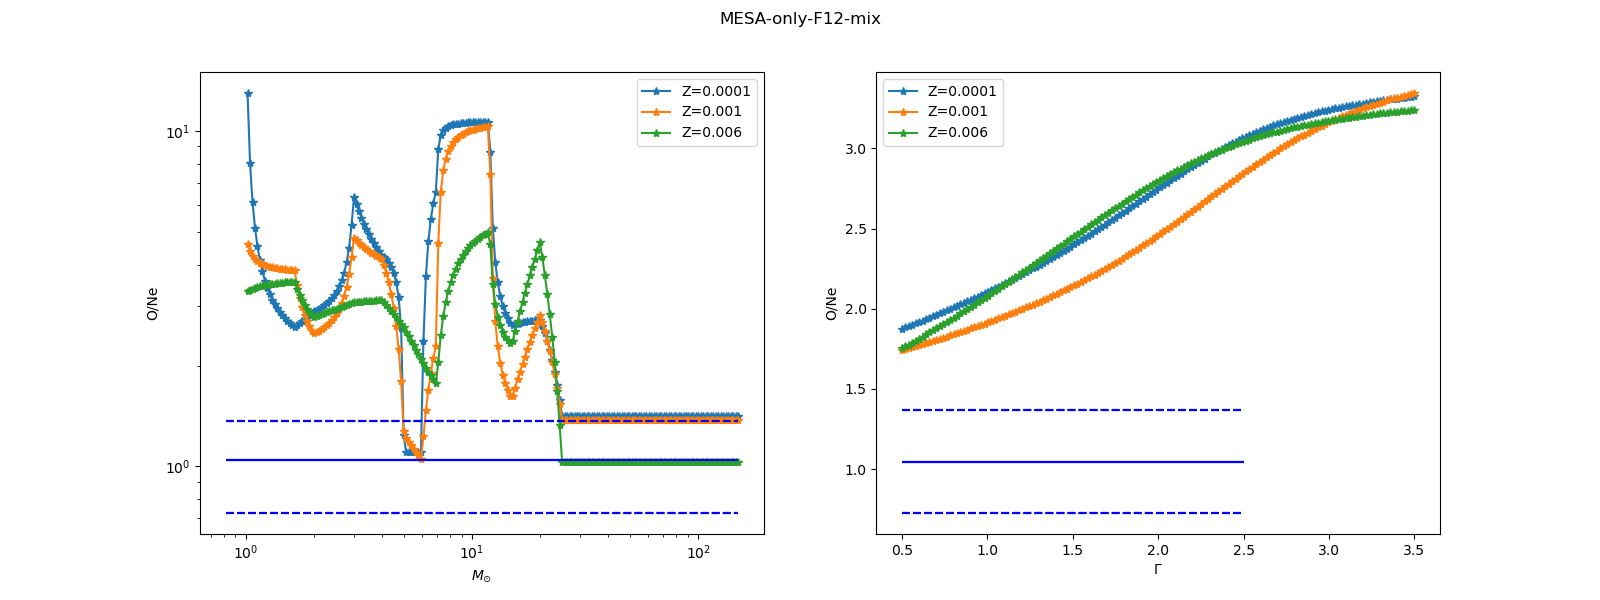

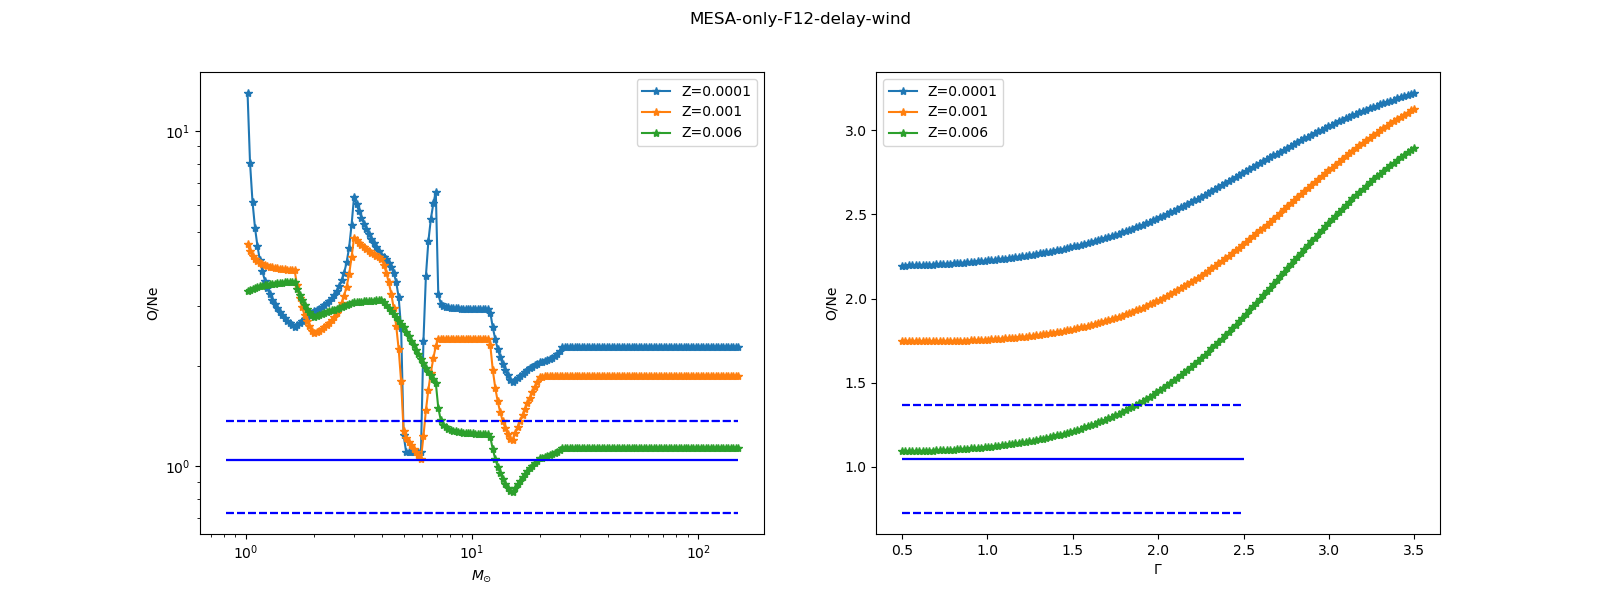

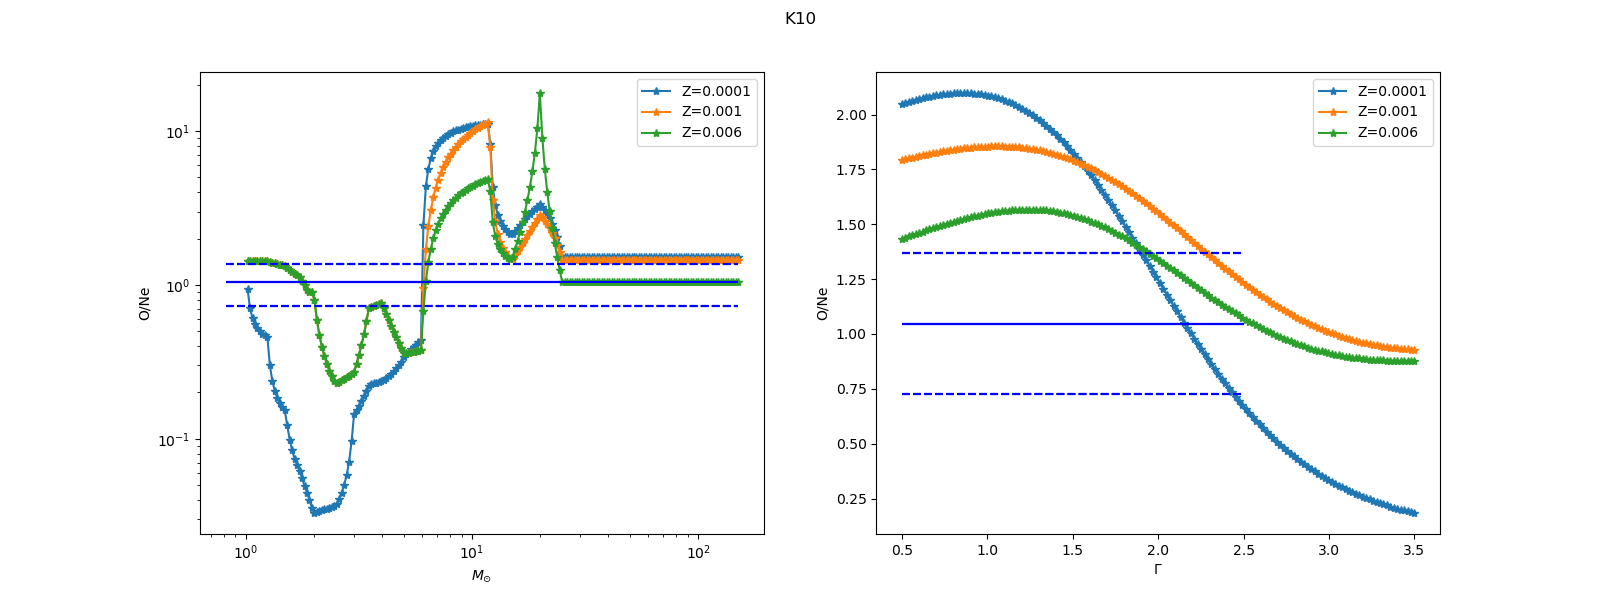

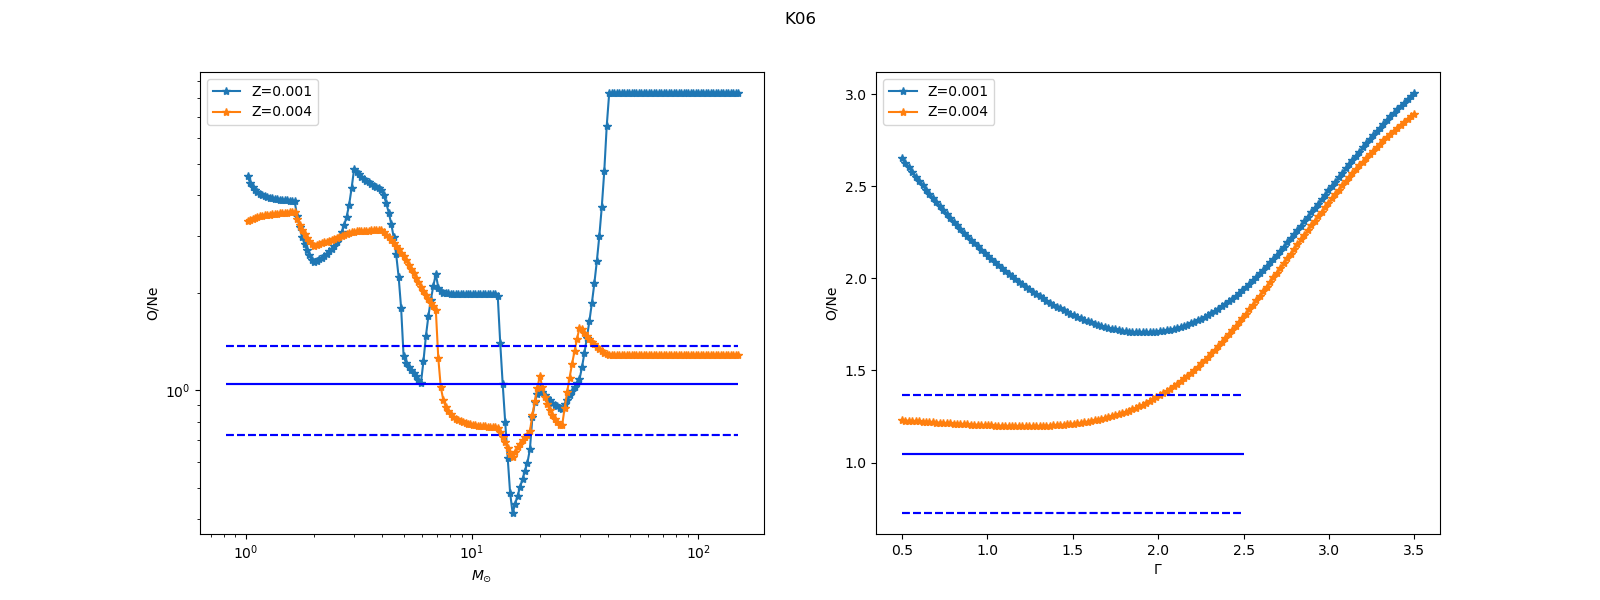

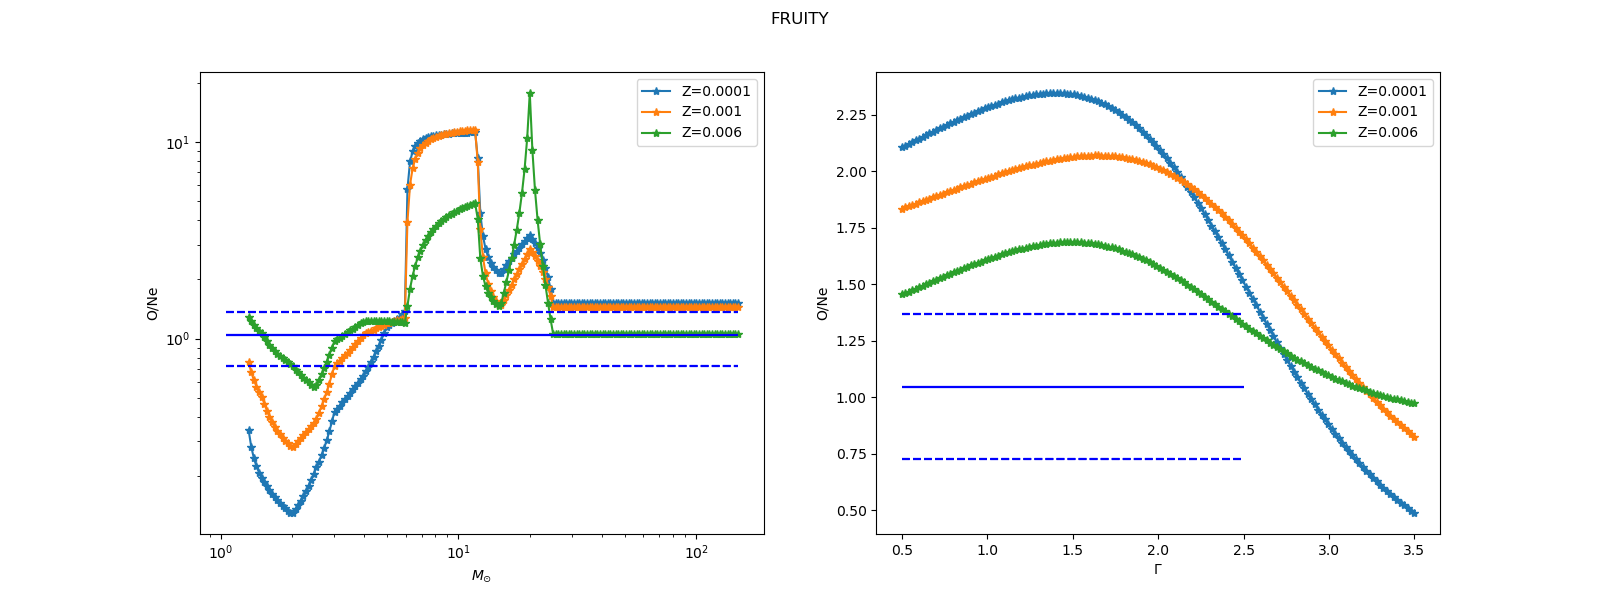

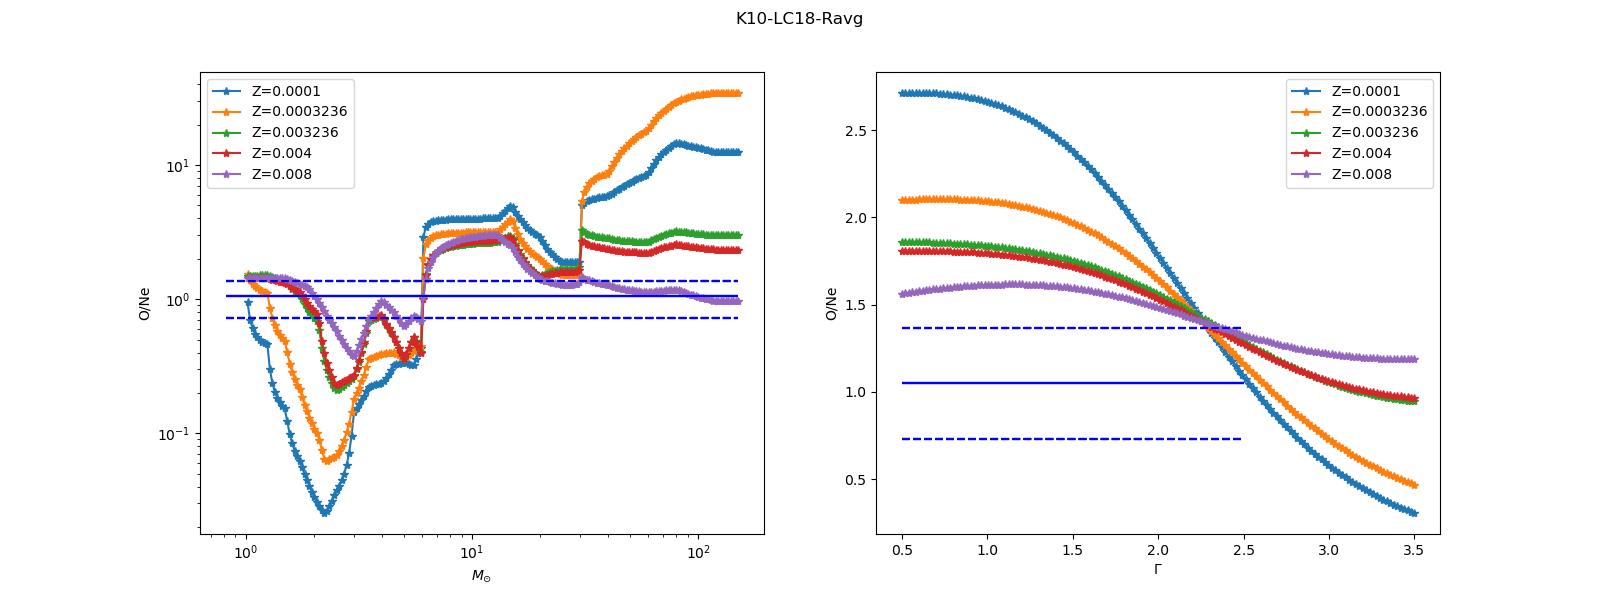

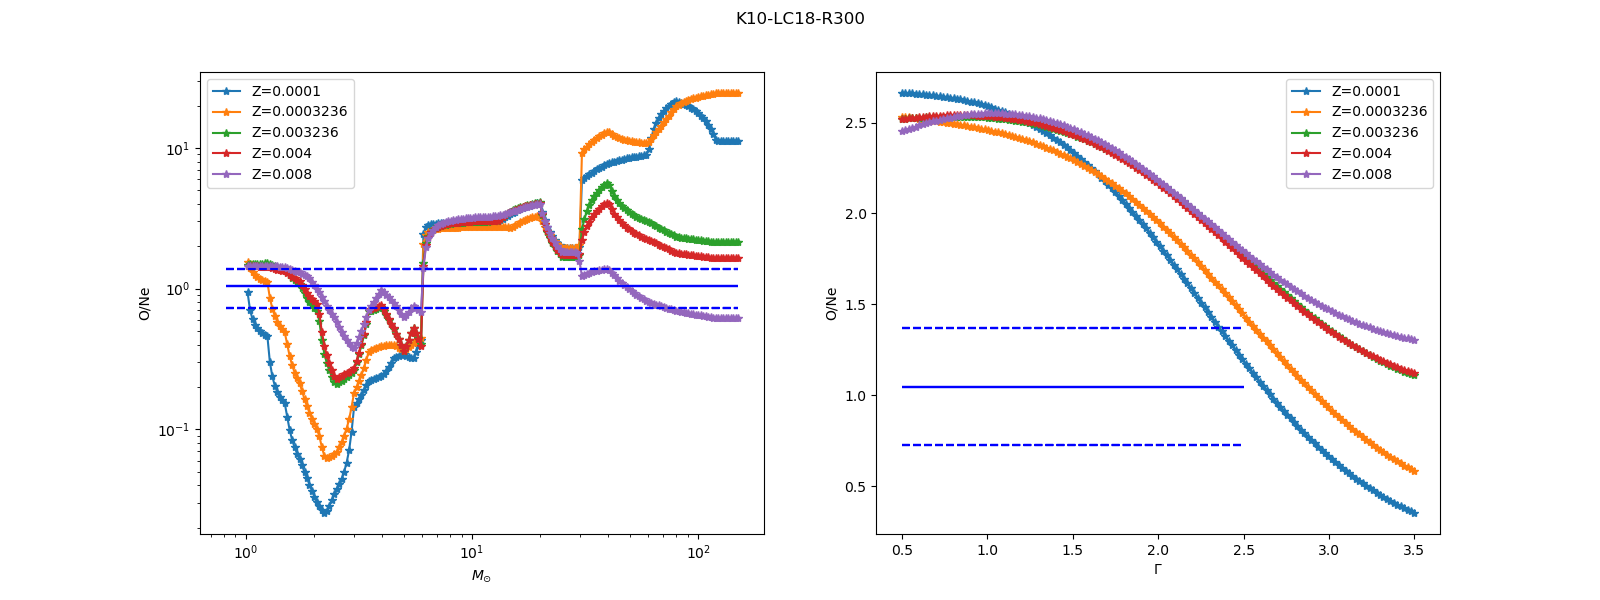

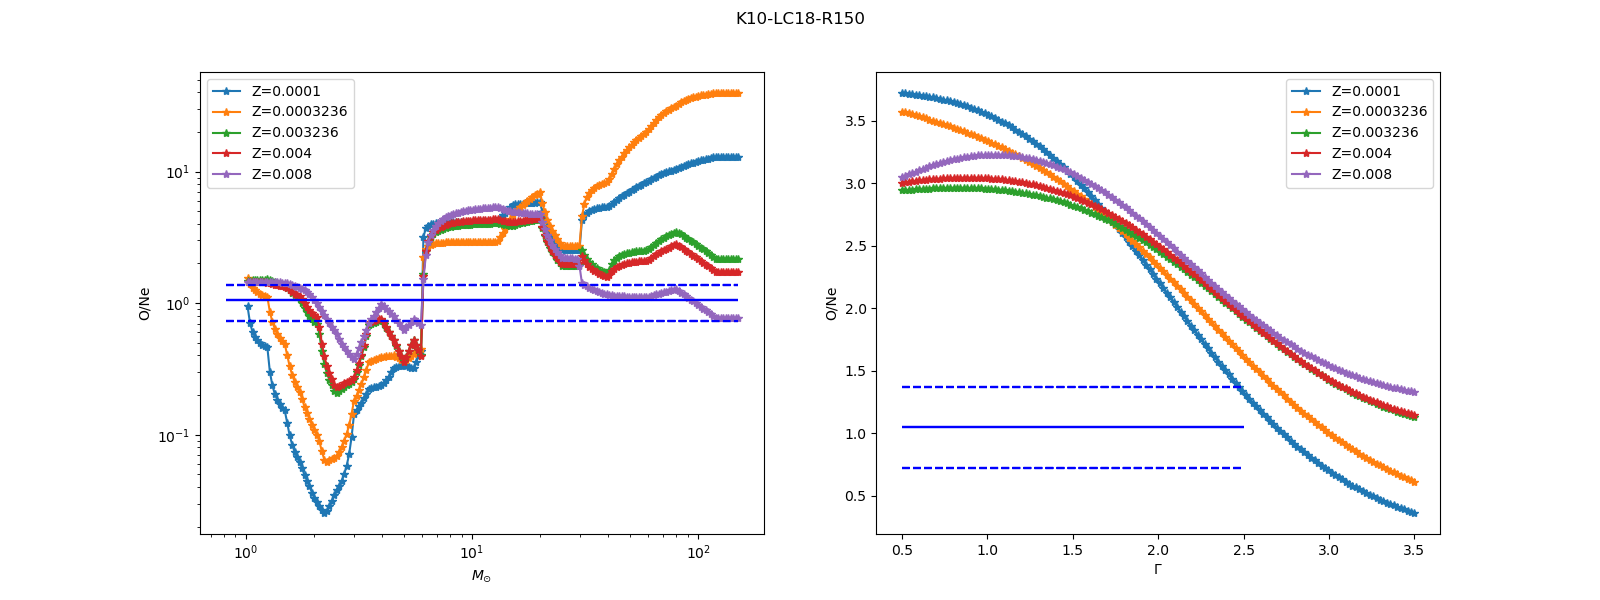

In [9]:
for model in yield_files.keys():
    # if model != "MESA-only-F12-ye":
    #     continue
    dfs = read_yields({model: yield_files[model]}, ElemNotice)
    Zmax = 0.008
    flag = True
    fig, axes = plt.subplots(ncols=2, figsize=(16,6))
    for key in dfs[model].keys():
        Zini = key.replace("Z_","").replace("_",".")
        Zini = Zini.replace("Z=","")
        Zini = float(Zini)
        if Zini > Zmax:
            continue
        Zi, Zj = "O", "Ne"
        x = dfs[model][key].columns.to_numpy().astype(float)
        try:
            y1 = dfs[model][key].loc[Zi].to_numpy().astype(float)
        except:
            print(f"The yields of {Zi} is not available in the yield table of {model} {key}")
            flag = False
            continue
        try:
            y2 = dfs[model][key].loc[Zj].to_numpy().astype(float)
        except:
            print(f"The yields of {Zj} is not available in the yield table of {model} {key}")
            flag = False
            continue
        mask = y2>0
        axes[0].plot(x[mask], y1[mask]/y2[mask]/(O2Ne[solar_set]), "-*", label=key.replace("Z_","Z=").replace("_","."))
        axes[0].hlines(obs_data['O/Ne'], x[mask].min()*0.8, 150, color='blue', linestyle='-')
        axes[0].hlines(obs_data['O/Ne+1sigma'], x[mask].min()*0.8, 150, color='blue', linestyle='--')
        axes[0].hlines(obs_data['O/Ne-1sigma'], x[mask].min()*0.8, 150, color='blue', linestyle='--')

        interp1 = interpolate.interp1d(x, y1, kind='linear', fill_value='extrapolate')
        interp2 = interpolate.interp1d(x, y2, kind='linear', fill_value='extrapolate')
        mass_bound = x[mask].min() if x[mask].min() > 1 else 1
        Zi2Zj = { }
        Zi2Zj[solar_set] = constants.abund_tables[solar_set][constants.elem_names.index(Zi)]/\
            constants.abund_tables[solar_set][constants.elem_names.index(Zj)]
        Gammas = np.linspace(0.5, 3.5, 150)
        Zi1 = np.array([quad(PowerLaw, mass_bound, constants.Mstar_max, args=(Gamma, interp1), full_output=1)[0] \
                        for Gamma in Gammas])
        Zj1 = np.array([quad(PowerLaw, mass_bound, constants.Mstar_max, args=(Gamma, interp2), full_output=1)[0] \
                        for Gamma in Gammas])
        axes[1].plot(Gammas, Zi1/Zj1/(Zi2Zj[solar_set]), "-*", label=key.replace("Z_","Z=").replace("_","."))
        axes[1].hlines(obs_data['O/Ne'], 0.5, 2.5, color='blue', linestyle='-')
        axes[1].hlines(obs_data['O/Ne+1sigma'], 0.5, 2.5, color='blue', linestyle='--')
        axes[1].hlines(obs_data['O/Ne-1sigma'], 0.5, 2.5, color='blue', linestyle='--')
        
    axes[0].loglog()
    # axes[0].set_ylim(1e-2, 1e2)
    axes[0].set_xlabel(r"$M_{\odot}$")
    axes[0].set_ylabel(f"{Zi}/{Zj}")
    axes[1].set_xlabel(r"$\Gamma$")
    axes[1].set_ylabel(f"{Zi}/{Zj}")
    axes[0].legend()
    axes[1].legend()
    fig.suptitle(model)
    if flag:
        fig.savefig(f"./Yields/Figures/{Zi}2{Zj}/{Zi}2{Zj}-{model}.pdf")
    plt.show()

In [7]:
plt.close("all")